# Unicorn Companies
## A data manipulation project with Python.

The dataset gather severeal billionare companies and show when they've became that, how much invested and by who.  
The project is developed to answer to the following questions:  

+ Which unicorn companies have had the biggest return on investment?

+ How long does it usually take for a company to become a unicorn? Has it always been this way?

+ Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

+ Which investors have funded the most unicorns? 

<span style="color:blue">*To scroll slides press right on keyboard, to view sub-slide press down. Esc for global view*</span>.

Dataset is from [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies?datasetId=2192732&sortBy=dateRun&tab=profile)
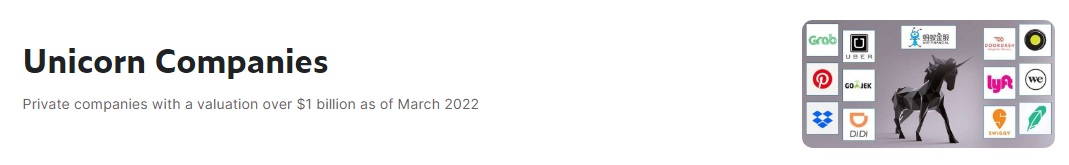

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import regex as re

# Read dataset
df = pd.read_csv("Unicorn_Companies.csv", delimiter=",")

In [867]:
df.shape

(1074, 10)

In [868]:
df.head(11)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [869]:
df.describe() # only two quantitative

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [870]:
df.dtypes # Type of variables

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [871]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

### Null Values
Variables like City and Select Investors has null values. The command to show them is df.isna()  
Below is shown a clear summary:

In [6]:
pd.DataFrame(df.isna().value_counts()) # check null value in each column

0
Company Valuation Date Joined Industry City  Country Continent Year Founded Funding Select Investors      
False   False     False       False    False False   False     False        False   False             1057
                                       True  False   False     False        False   False               16
                                       False False   False     False        False   True                 1

In [873]:
# na values
df.isnull().sum() # 16 city null and 1 select investor null

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [875]:
# show where city is null
citynull = np.where(df['City'].isnull())
df.iloc[citynull]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [876]:
citynull = df.iloc[citynull] # new df with only city:NAN
citynull[["Country"]]

,Country
12,Bahamas
170,Singapore
242,Singapore
251,Singapore
325,Hong Kong
382,Singapore
541,Singapore
811,Singapore
848,Singapore
880,Singapore


In [877]:
countrywithnll = citynull.Country.unique()

After some manipulation, it's shown all the cities in each country that has at least one NaN value.   
Singapore has only NaN city like Bahamas. Hong Kong is mixed with NaN and cities. 

In [878]:
# show for every country with a null value all the cities 
for i in countrywithnll:
    asd=df[df.Country.isin([i])]
    print(asd[['City', 'Country']])

   City  Country
12  NaN  Bahamas
    City    Country
170  NaN  Singapore
242  NaN  Singapore
251  NaN  Singapore
382  NaN  Singapore
541  NaN  Singapore
811  NaN  Singapore
848  NaN  Singapore
880  NaN  Singapore
889  NaN  Singapore
980  NaN  Singapore
986  NaN  Singapore
994  NaN  Singapore
                City    Country
56    Cheung Sha Wan  Hong Kong
325              NaN  Hong Kong
595          Kowloon  Hong Kong
720          Central  Hong Kong
893              NaN  Hong Kong
1061             NaN  Hong Kong


### Typing error
A specific view about Industry variable shows an error of typing for Artificial Intelligence (first two rows)

In [879]:
# industry
sorted(list(df['Industry'].unique()), reverse = False) # there is AI repeated

['Artificial Intelligence',
 'Artificial intelligence',
 'Auto & transportation',
 'Consumer & retail',
 'Cybersecurity',
 'Data management & analytics',
 'E-commerce & direct-to-consumer',
 'Edtech',
 'Fintech',
 'Hardware',
 'Health',
 'Internet software & services',
 'Mobile & telecommunications',
 'Other',
 'Supply chain, logistics, & delivery',
 'Travel']

In [7]:
df['Industry'] = df['Industry'].replace(['Artificial intelligence'],'Artificial Intelligence') # renaming

Now I can count rows for each Industry type. 

In [8]:
# Industry analysis
df['Industry'].value_counts() # 15
#df['Industry'].value_counts()['Fintech']

Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Artificial Intelligence                 84
Health                                  74
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Industry, dtype: int64

In [10]:
ind = df['Industry'].value_counts()
ind = pd.DataFrame(ind)
ind['%']= ind / ind.sum() * 100
print(ind) # to show percentage

                                     Industry          %
Fintech                                   224  20.856611
Internet software & services              205  19.087523
E-commerce & direct-to-consumer           111  10.335196
Artificial Intelligence                    84   7.821229
Health                                     74   6.890130
Other                                      58   5.400372
Supply chain, logistics, & delivery        57   5.307263
Cybersecurity                              50   4.655493
Data management & analytics                41   3.817505
Mobile & telecommunications                38   3.538175
Hardware                                   34   3.165736
Auto & transportation                      31   2.886406
Edtech                                     28   2.607076
Consumer & retail                          25   2.327747
Travel                                     14   1.303538


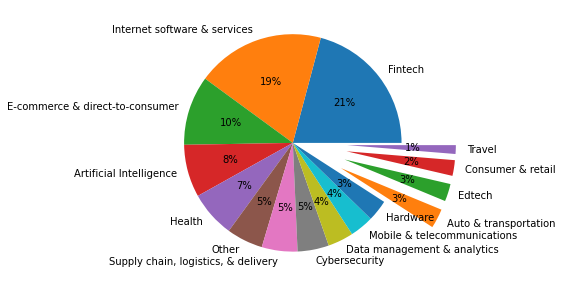

In [49]:
qwert = df['Industry'].value_counts().index
explode = [0, 0, 0, 0, 0,
          0,0,0,0,0,
          0,0.5,0.5,0.5,0.5]

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(df['Industry'].value_counts(), 
      labels = qwert,
      autopct='%.0f%%',
      explode = explode)
plt.show() # pie chart

Top billionaire companies' Cateogries are involved with internet. Fintech, Internet services and E-commerce are the most prolific areas. 

# Where are located most of unicorns?  
  
Data Analysis proceed with Continent.

In [884]:
# continent analysis
continent = pd.DataFrame(df['Continent'].value_counts()) # converto in df e conto i valori 
continent['%'] = continent / continent.sum() * 100
print(continent) # Norh America is the greatest with 54%

               Continent          %
North America        589  54.841713
Asia                 310  28.864060
Europe               143  13.314711
South America         21   1.955307
Oceania                8   0.744879
Africa                 3   0.279330


<AxesSubplot:xlabel='Continent', ylabel='Count'>

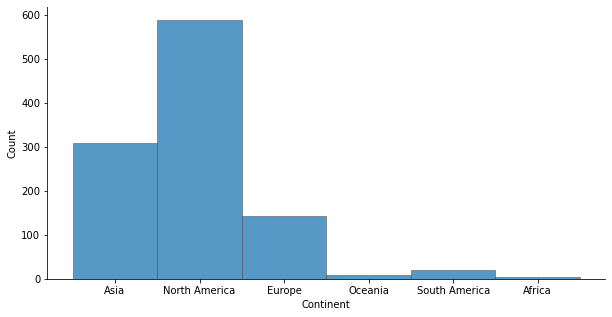

In [885]:
f, ax = plt.subplots(figsize=(10, 5)) # for plot dimensions !!
sns.despine(f) # remove cartesian's lines o top and right

sns.histplot(df,
            x = 'Continent',
            multiple="stack",
            palette="light:m_r",
            edgecolor=".3",
            linewidth=.5)

# Analysis between valuation and funding

Is there a correlation between these two variables? 

In [2]:
# renaming column
# df.rename(columns={"Valuation":"Valuation"}, inplace= True) 
# inplace is fundamental because this command create, by default, a new df with renamend column
# with inplace I told him to modifiy existing one

# Now remove B and $ from values in Valuation and conversion to int
df['Valuation'] = df['Valuation'].str.replace(
    "B","", regex= True).str.replace(
    "$", "", regex = True) # command str.replace is for replacing values in columns
df['Valuation'] = df['Valuation'].astype(int)

# otherway
#df['Valuation'] = np.where(df.Valuation.str.contains("B"), "", df['Valuation']) # good to know
# 'where' wants three argument: condition, what to do if it's true, what else

# pd.to_numeric(df['Valuation'], inplace = True) # conversion in numeric

In [887]:
df.Valuation.unique()

array([180, 100,  95,  46,  40,  39,  38,  33,  32,  27,  25,  22,  20,
        18,  17,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,
         4,   3,   2,   1])

In [3]:
# using "where" I selected values in Million and added "0," at the start!!
df['Funding'] = np.where(df['Funding'].str.endswith("M"),
                         df["Funding"].str.replace("$","0,", regex = True), 
                         df["Funding"].str.replace("$","", regex = True))
df['Funding'] = df['Funding'].str.replace("B", "", regex = True).str.replace("M","", regex = True)# removed "B" and "M"
df['Funding'] = df['Funding'].replace("Unknown", np.nan) # added NaN instead of unknown
df['Funding'] = df['Funding'].str.replace(",", ".", regex = True).astype(float) # converting string to float (ex. 1,468)
df['Funding'] = df['Funding'].round(2)

In [4]:
df['Funding'].unique()

array([ 8.  ,  7.  ,  2.  ,  4.  ,  0.57,  3.  , 14.  ,  5.  ,  0.92,
        0.48,  0.77,  0.98,  0.72,  0.49,  0.73,  0.43,  0.4 ,  1.  ,
        0.8 ,  0.76,  0.38,  0.56,  0.29,  0.33,  0.69,  0.34,  0.5 ,
        0.71,  0.68,  0.78,  0.1 ,  0.74,  0.61,  0.55,  0.66,  0.82,
        0.3 ,  0.86,  0.45,  0.84,  0.6 ,  0.58,  0.91,  0.85,  0.42,
        0.64,  0.63,  0.93,  0.89,  0.52,  0.59,  0.83,  0.41,  0.87,
        0.19,  0.94,  0.51,  0.65,  0.46,  0.37,  0.9 ,  0.7 ,  0.26,
        0.22,  0.13,  0.12,  0.47,  0.54,  0.95,  0.44,  0.  ,  0.35,
        0.79,  0.32,   nan,  0.67,  0.25,  0.11,  0.88,  0.23,  0.15,
        0.53,  0.75,  0.28,  0.27,  0.31,  0.99,  0.36,  0.2 ,  0.81,
        0.39,  0.17,  0.24,  0.18,  0.14,  0.21,  0.62,  0.96,  0.16])

In [890]:
df.Funding.isnull().value_counts()

False    1062
True       12
Name: Funding, dtype: int64

In [891]:
df.Funding.describe()

count    1062.000000
mean        0.578757
std         0.805750
min         0.000000
25%         0.240000
50%         0.390000
75%         0.647500
max        14.000000
Name: Funding, dtype: float64

After renaming variables and modifications about correct unit of measure, it's shown unicorns with funding values equal to NaN

In [892]:
fundingNull = df[df.Funding.isnull()] # created df with all Null value of Funding
fundingNull # lets ignore it

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
215,SSENSE,4,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,NaN,Sequoia Capital
424,Uplight,2,2021-03-03,Other,Boulder,United States,North America,2019,NaN,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,2,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,NaN,Blackstone
639,SITECH DEV,1,2019-05-16,Other,Guiyang,China,Asia,2017,NaN,China Prosperity Capital
651,Xiaobing,1,2021-07-12,Fintech,Beijing,China,Asia,2020,NaN,"NetEase Capital, Northern Light Venture Capita..."
717,Veepee,1,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,NaN,"Summit Partners, Qatar Holding"
733,DistroKid,1,2021-08-16,Internet software & services,New York,United States,North America,2013,NaN,"Insight Partners, Silversmith Capital Partners..."
866,Assembly,1,2021-09-21,Internet software & services,Culver City,United States,North America,2019,NaN,"Advent International, PSG, Providence Equity P..."
890,Carson Group,1,2021-07-14,Fintech,Lincoln,United States,North America,2012,NaN,Bain Capital
945,Iodine Software,1,2021-12-01,Data management & analytics,Austin,United States,North America,2010,NaN,"Advent International, Bain Capital Ventures, S..."


(0.0, 25.0)

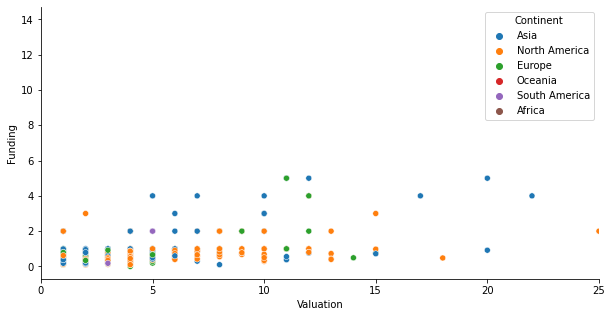

In [893]:
f, ax = plt.subplots(figsize=(10, 5)) # for plot dimensions !!
sns.despine(f) # remove cartesian's lines o top and right

sns.scatterplot(data = df,
               x = "Valuation",
               y = "Funding",
               hue="Continent")
plt.xlim(0,25) # from 0 to 25

(25.0, 188.95)

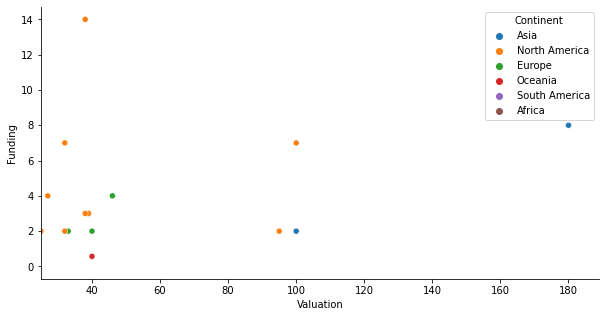

In [894]:
f, ax = plt.subplots(figsize=(10, 5)) # for plot dimensions !!
sns.despine(f) # remove cartesian's lines o top and right

sns.scatterplot(data = df,
               x = "Valuation",
               y = "Funding",
               hue="Continent")
plt.xlim(left=25)

It doesn't seem being a relationship between Funding and Valuation. We expected a positive relation but it's not so clear.

In [895]:
df.corr()

,Valuation,Year Founded,Funding
Valuation,1.000000,-0.074395,0.595400
Year Founded,-0.074395,1.000000,-0.088698
Funding,0.595400,-0.088698,1.000000


In [896]:
df.Valuation.corr(df.Funding)

0.5954004787075707

Correlation is slightly more than 50% so nothing can be said about.

<AxesSubplot:xlabel='Valuation', ylabel='Funding'>

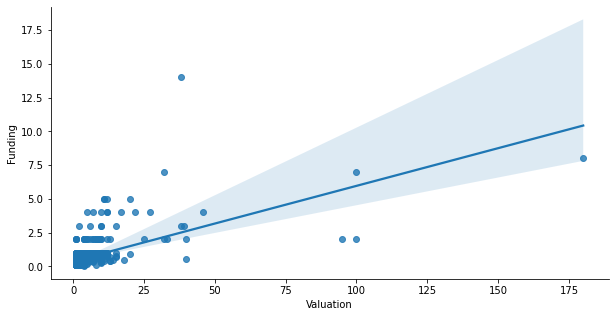

In [6]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
sns.regplot(data=df, x="Valuation", y = "Funding",)

# More prolific Cities

Examination of cities with more billionaire companies 

In [897]:
df.City.describe() # useful description by pandas

count              1058
unique              256
top       San Francisco
freq                152
Name: City, dtype: object

In [898]:
# SKIP
asd = df.City.value_counts() 
asd = pd.DataFrame(asd)
asd["Perc"] = asd / len(asd) * 100
asd["Perc"] = sorted(asd.Perc, reverse = True) # ordered descending 
for i in range(len(asd["Perc"])-1): # removing with if inside a for loop cities under 3 %, it's only a try
    if asd["Perc"].iloc[i+1] < 3:
        asd["Perc"].iloc[i+1] = 0
    else:
        i = i + 1 
        
asd.head(30)
#---------

C:\Users\Patrizio\AppData\Local\Temp\ipykernel_5132\267239113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd["Perc"].iloc[i+1] = 0


,City,Perc
San Francisco,152,59.375000
New York,103,40.234375
Beijing,63,24.609375
Shanghai,44,17.187500
London,34,13.281250
Bengaluru,29,11.328125
Shenzhen,19,7.421875
Paris,19,7.421875
Palo Alto,18,7.031250
Berlin,17,6.640625


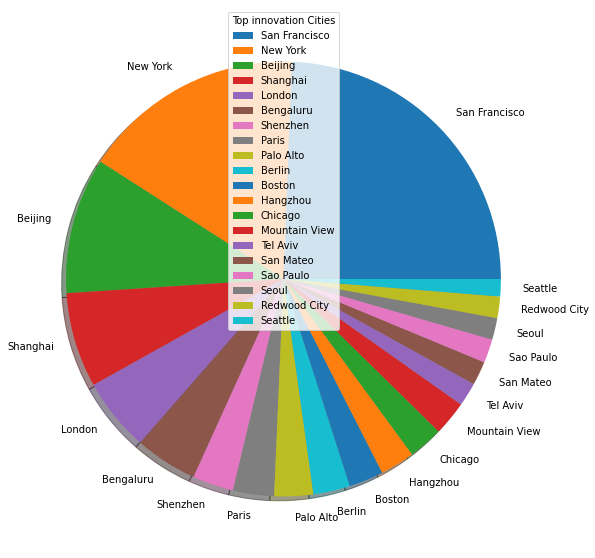

In [899]:
qwe = pd.DataFrame(df.City.value_counts().head(20))
qwe["Perc"] = qwe / len(qwe) * 100
qwe["Perc"] = sorted(qwe.Perc, reverse = True)
label = qwe.axes[0] # to extract row indexes

plt.subplots(figsize=(15, 10))
plt.pie(qwe.Perc, 
      labels = label,
      shadow = True)
plt.legend(title = "Top innovation Cities", 
           loc = 9)
plt.show() # pie chart

As showed by Country: North America has the two biggest innovation cities: NY ans SanF, followed by China with Beijing and Shangai.

# Which unicorn companies have the biggest return on investment?

To determine ROI is required a column which enhance this expression: 

```
ROI = (Valuation - Funding) / Funding * 100
```

In [900]:
roi = pd.DataFrame(df.loc[:,["Company", "Valuation", "Funding", "Date Joined", "Year Founded"]])
# the biggest ROI ignoring time
# I have to calculate Net Profit by decreasing to Valuation the Funding
# then divide by Funding * 100
roi['NetProfit'] = roi.Valuation - roi.Funding
roi['ROI'] = roi.NetProfit / roi.Funding
roi['ROI'] = (roi.ROI * 100).round(2)
#roi["roi"] = (((roi.Valuation - roi.Funding) / roi.Funding) * 100).round(2) # why doesn't workkkkk?
#roi.sort_values('ROI', ascending = False)
roi.sort_values('ROI', ascending=False).head(11)

,Company,Valuation,Funding,Date Joined,Year Founded,NetProfit,ROI
189,Otto Bock HealthCare,4,0.00,2017-06-24,1919,4.00,inf
72,DJI Innovations,8,0.10,2015-01-23,2006,7.90,7900.00
5,Canva,40,0.57,2018-01-08,2012,39.43,6917.54
2,SHEIN,100,2.00,2018-07-03,2008,98.00,4900.00
3,Stripe,95,2.00,2014-01-23,2010,93.00,4650.00
239,Zapier,4,0.10,2021-01-14,2011,3.90,3900.00
18,Miro,18,0.48,2022-01-05,2011,17.52,3650.00
226,Clubhouse,4,0.11,2021-01-24,2020,3.89,3536.36
47,Ripple,10,0.29,2019-12-20,2012,9.71,3348.28
175,Kraken,4,0.12,2019-06-25,2011,3.88,3233.33


In [901]:
na = np.where(roi.ROI.isnull())
roi.loc[na] # ok, every NaN is due from Funding == NaN

,Company,Valuation,Funding,Date Joined,Year Founded,NetProfit,ROI
215,SSENSE,4,NaN,2021-06-08,2003,NaN,NaN
424,Uplight,2,NaN,2021-03-03,2019,NaN,NaN
567,ISN,2,NaN,2020-12-17,2001,NaN,NaN
639,SITECH DEV,1,NaN,2019-05-16,2017,NaN,NaN
651,Xiaobing,1,NaN,2021-07-12,2020,NaN,NaN
717,Veepee,1,NaN,2007-07-02,2001,NaN,NaN
733,DistroKid,1,NaN,2021-08-16,2013,NaN,NaN
866,Assembly,1,NaN,2021-09-21,2019,NaN,NaN
890,Carson Group,1,NaN,2021-07-14,2012,NaN,NaN
945,Iodine Software,1,NaN,2021-12-01,2010,NaN,NaN


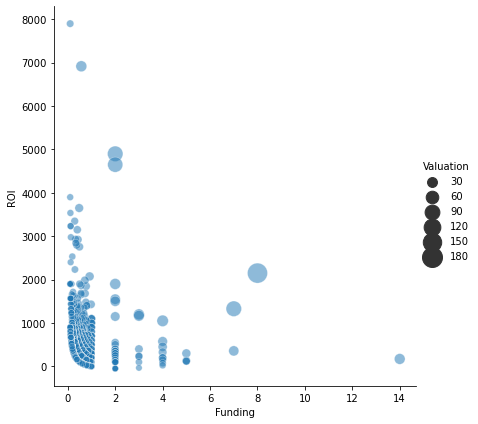

In [902]:
sns.relplot(x="Funding", y="ROI", size="Valuation",sizes=(40, 400), alpha=.5, palette="muted", height=6, data=roi)

Most of ROIs is near 0 with peaks over 4000%

# How long does it usually take for a company to become a unicorn? 

In [874]:
# change in date type
df['Date Joined'] = pd.to_datetime(df['Date Joined']) 

In [903]:
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format= "%Y") # converted in date time with 01/01 starting point
diff = df['Date Joined'] - df['Year Founded'] # simple difference
diff_float = diff.astype(str) # convert to string
diff_float = diff_float.str.replace("days","", regex = True).astype(int) # remove days and transform into integer
diff_float = diff_float / 365 # calculate years

In [904]:
diff_float = diff_float.astype(str).str.slice(0,5).astype(float) # sliced number of characters. required to be string
df["Timing in years"] = diff_float # added to df 

In [905]:
df.sort_values("Timing in years",ascending = True).head() # Yidian Zixun must be ignored

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Timing in years
714,Yidian Zixun,1,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021-01-01,0.15,"Phoenix New Media, Tianjin Haihe Industry Fund",-3.210
161,Ola Electric Mobility,5,2019-07-02,Auto & transportation,Bengaluru,India,Asia,2019-01-01,0.76,"SoftBank Group, Tiger Global Management, Matri...",0.498
1001,Playco,1,2020-09-21,Other,Tokyo,Japan,Asia,2020-01-01,0.14,"Sozo Ventures, Caffeinated Capital, Sequoia Ca...",0.723
396,candy.com,2,2021-10-21,Fintech,New York,United States,North America,2021-01-01,0.10,"Insight Partners, Softbank Group, Connect Vent...",0.802
554,ClickHouse,2,2021-10-28,Data management & analytics,Portola Valley,United States,North America,2021-01-01,0.30,"Lightspeed Venture Partners, Almaz Capital Par...",0.821


Table above shows top 5 faster companies to be valued billions.
The first must be ignored cause there is some issues with date fundation and/or data joined. The other ones are from Norh-America and Asia and were really fast. To explaine this velocity to reach billion valuation we need more information. Probably they are acquired by holdings or were founded as a division of a multinational company so, they already had resources to became so much valuable in so little time.

In [906]:
df.sort_values("Timing in years",ascending = False).head() # the longest is 98 years

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Timing in years
189,Otto Bock HealthCare,4,2017-06-24,Health,Duderstadt,Germany,Europe,1919-01-01,0.00,EQT Partners,98.54
373,Promasidor Holdings,2,2016-11-08,Consumer & retail,Bryanston,South Africa,Asia,1979-01-01,0.56,"IFC, Ajinomoto",37.87
699,Five Star Business Finance,1,2021-03-26,Other,Chennai,India,Asia,1984-01-01,0.46,"Sequoia Capital India, Tiger Global Management...",37.25
1043,Thirty Madison,1,2021-06-02,Health,New York,United States,North America,1993-01-01,0.21,"Northzone Ventures, Maveron, Johnson & Johnson...",28.43
840,Radius Payment Solutions,1,2017-11-27,Fintech,Crewe,United Kingdom,Europe,1990-01-01,0.20,Inflexion Private Equity,27.92


Above there is another table with the slowest companies. The worst required almost one century but has collected 0,00 Billion $ in funding to became a billionaire.  

In [907]:
df["Timing in years"].describe() # mean is 7 years

count    1074.000000
mean        7.489383
std         5.316395
min        -3.210000
25%         4.444250
50%         6.461500
75%         9.100000
max        98.540000
Name: Timing in years, dtype: float64

Mean time is 7 years.

(0.0, 6.0)

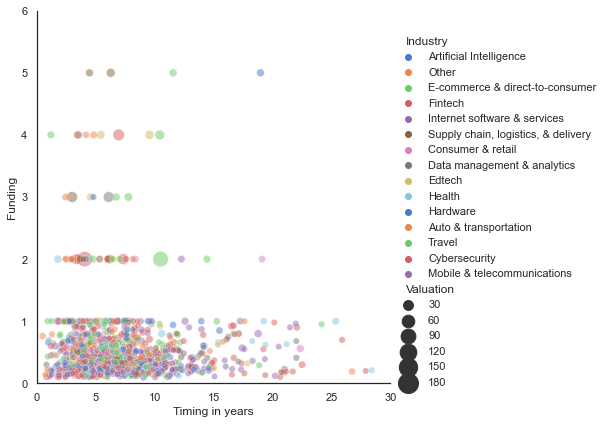

In [908]:
sns.set_theme(style="white")
sns.relplot(x=df["Timing in years"], y="Funding", hue = "Industry", size="Valuation",sizes=(40, 400), 
            alpha=.5, palette="muted", height=6, data=df)
#plt.xlim(0,30) # X limit
#plt.ylim(0,6) # Y limit

Great amount of billionaire companies has collected less than 1 billion to became billionaire. 
Industry is really mixed, there isn't a visible trend.

In [909]:
# df[df.Company == "Tesla"] # how to search a specific value in a column

# Which investors have funded the most unicorns?

In [7]:
df = df.rename(columns={'Select Investors': 'Investors'}, inplace=False)

In [12]:
pd.DataFrame(df.Investors.unique()).rename(columns={0:'Investor'}, inplace=False)

,Investor
0,"Sequoia Capital China, SIG Asia Investments, S..."
1,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,"Tiger Global Management, Sequoia Capital China..."
3,"Khosla Ventures, LowercaseCapital, capitalG"
4,"Institutional Venture Partners, Sequoia Capita..."
...,...
1054,"K2 Ventures, Matrix Partners China, IDG Capital"
1055,"58.com, Tencent Holdings"
1056,"Xingwang Investment Management, China Capital ..."
1057,"IAG Capital Partners, Augmentum Fintech, North..."


Output above is shown only to see that column (renamed) Investors contains from 1 to 4 Venture capitalist per row.

In [912]:
df.Investors.value_counts(sort = True)

Sequoia Capital                                             3
Pelion Venture Partners, Foundation Capital, Thoma Bravo    2
Insight Partners, Sequoia Capital, Index Ventures           2
Speedinvest, Valar Ventures, Uniqa Ventures                 2
SoftBank Group                                              2
                                                           ..
Trustbridge Partners, IDG Capital, Sequoia Capital China    1
K2VC, Lightspeed China Partners, Sky9 Capital               1
Automobile Industry Guidance Fund                           1
Trustbridge Partners, Hony Capital, IDG Capital             1
Novator Partners, True, Causeway Media Partners             1
Name: Investors, Length: 1058, dtype: int64

In [913]:
df[df.Investors == "Sequoia Capital"] # it shows only investor row with only " ", not where it's included between commas

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Investors,Timing in years
215,SSENSE,4,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003-01-01,NaN,Sequoia Capital,18.44
505,MUSINSA,2,2019-11-11,E-commerce & direct-to-consumer,Seoul,South Korea,Asia,2001-01-01,0.29,Sequoia Capital,18.87
518,Retool,2,2021-12-22,Internet software & services,San Francisco,United States,North America,2000-01-01,0.96,Sequoia Capital,21.98


In [914]:
topInv = pd.DataFrame(df.loc[:,['Valuation', 'Investors']]).sort_values(by= 'Valuation', ascending= False)
# selected Valuation and Investor and ordered by biggest Valuation to lowest
topInv.head(11)

,Valuation,Investors
0,180,"Sequoia Capital China, SIG Asia Investments, S..."
1,100,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,100,"Tiger Global Management, Sequoia Capital China..."
3,95,"Khosla Ventures, LowercaseCapital, capitalG"
4,46,"Institutional Venture Partners, Sequoia Capita..."
5,40,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,40,"Tiger Global Management, Insight Partners, DST..."
7,39,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,38,Tiger Global Management
9,38,"Andreessen Horowitz, New Enterprise Associates..."


Column Investors has from 1 to 4 investors separated by comma. I have to split them

In [915]:
#topInv[["Investor1", "Investor2", "Investor3"]] = topInv.Investors.str.split(pat=",", expand = True)
topInv.Investors.str.split(pat=",", expand = True).iloc[:,[3]].describe() # there are investors with 4 investor
ghj = topInv.Investors.str.split(pat=",", expand = True).iloc[:,[3]]
ghj[3].sort_values(ascending = False).head(15) # yes, there are 4 columns, so..
topInv[["Inv1", "Inv2", "Inv3", "Inv4"]] = topInv.Investors.str.split(pat = ",", expand = True) # created new column
# with name
# NOTE for calling new columns i have to use two square brackets
# topInv = topInv.drop(columns= ['Investors'])

In [916]:
topInv.Inv2.value_counts()

 Tiger Global Management    20
 Accel                      18
 Sequoia Capital            17
 General Catalyst           15
 Insight Partners           14
                            ..
 AME Cloud Ventures          1
 Eleation Capital            1
 Alven Capital               1
 CJ ENM                      1
 True                        1
Name: Inv2, Length: 601, dtype: int64

In [917]:
topInv.Inv3.value_counts()

 Tiger Global Management        19
 Sequoia Capital                13
 Accel                          13
 Andreessen Horowitz            12
 Lightspeed Venture Partners    11
                                ..
 Spectrum Equity                 1
 Bank of China                   1
 Vast Ventures                   1
 Asset Management Ventures       1
 Causeway Media Partners         1
Name: Inv3, Length: 576, dtype: int64

In [918]:
topInv.Inv4.value_counts()

 Softbank Group                    1
 Spark Capital                     1
 SDIC CMC Investment Management    1
 Redpoint e.ventures               1
 Redpoint Ventures                 1
 Goldman Sachs                     1
 McKesson Ventures                 1
 Accel                             1
Name: Inv4, dtype: int64

In [919]:
topInv.iloc[np.where(topInv.Investors.str.contains("Sequoia Capital"))] # splitted
# there are two sequoia capital, with and without China and more..

,Valuation,Investors,Inv1,Inv2,Inv3,Inv4
0,180,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
2,100,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
4,46,"Institutional Venture Partners, Sequoia Capita...",Institutional Venture Partners,Sequoia Capital,General Atlantic,None
5,40,"Sequoia Capital China, Blackbird Ventures, Mat...",Sequoia Capital China,Blackbird Ventures,Matrix Partners,None
12,32,"Sequoia Capital, Thoma Bravo, Softbank",Sequoia Capital,Thoma Bravo,Softbank,None
...,...,...,...,...,...,...
737,1,"Insight Partners, Sequoia Capital, Stripes Group",Insight Partners,Sequoia Capital,Stripes Group,None
750,1,"Sequoia Capital, Y Combinator, Accel",Sequoia Capital,Y Combinator,Accel,None
767,1,"Sequoia Capital India, Hillhouse Capital Manag...",Sequoia Capital India,Hillhouse Capital Management,Sunley House Capital Management,None
766,1,"Advent International, Battery Ventures, Sequoi...",Advent International,Battery Ventures,Sequoia Capital Israel,None


Splitted in 4 columns

In [920]:
553+601+576+8

1738

In [921]:
# c1 = pd.DataFrame(topInv.Inv1.value_counts())
# c2 = pd.DataFrame(topInv.Inv2.value_counts())
# c3 = pd.DataFrame(topInv.Inv3.value_counts())
# c4 = pd.DataFrame(topInv.Inv4.value_counts())

##### let' find an automated way to do it -------

d = {} # Dictionary
for i in list(range(2,6,1)):
    d['c'+str(i)]=pd.DataFrame(topInv.iloc[:,[i]].value_counts()) # dictionary with c2 to c5
    
antonio = []
for i in list(range(2,6,1)): # list extracted from dict
    pl = d['c'+str(i)]
    antonio.append([pl])
# I'm not able to perform a for loop for concatenating lists

In [922]:
#a = pd.Index(list(range(0,len(c1),1)))
c1 = pd.concat([antonio[0][0], antonio[1][0], antonio[2][0], antonio[3][0]])
c1.reset_index(level = 0, inplace = True) # add index 
c1 = c1.rename(columns={'Inv1':'investor',0:'count'}) # rename column 
# c1['investor'] = c1.index # useful to extract index!

After splitting and concatenated them, a specific search shows duplicats not identified by code. Below there is an example.

In [923]:
c1.iloc[np.where(c1.investor.str.contains("Sequoia Capital"))] # there are duplicates

,investor,count
0,Sequoia Capital China,30
4,Sequoia Capital,17
12,Sequoia Capital India,11
241,Sequoia Capital Israel,1
555,Sequoia Capital,17
565,Sequoia Capital India,8
568,Sequoia Capital China,8
1155,Sequoia Capital,13
1160,Sequoia Capital China,10
1173,Sequoia Capital India,6


In [924]:
c1[c1.investor == "Sequoia Capital"]

,investor,count
4,Sequoia Capital,17


In [925]:
c1[c1.investor == " Sequoia Capital"]

,investor,count
555,Sequoia Capital,17
1155,Sequoia Capital,13


As shown, in the last two chunks, for "Sequoia Capital" there are different rows because of spaces.

In [926]:
c2 = c1.groupby(['investor']).sum('count').sort_values('count', ascending= False) # groupby
c2.reset_index(level=0, inplace=True)

In [927]:
c2.iloc[np.where(c2.investor.str.contains("Sequoia"))] # there are duplicates not got by groupby
# it is for blanket spaces, let's try to solve

,investor,count
2,Sequoia Capital China,30
3,Sequoia Capital,30
15,Sequoia Capital China,18
16,Sequoia Capital,17
23,Sequoia Capital India,14
37,Sequoia Capital India,11
736,Sequoia Capital Israel,1
1337,and Sequoia Capital China,1
1498,Sequoia Capital Israel,1


In [929]:
c2.investor = c2.investor.str.replace(" ", "") # removed blank spaces
c2[c2.investor.duplicated()] # now it finds duplicates

,investor,count
5,Accel,28
6,AndreessenHorowitz,24
8,InsightPartners,23
15,SequoiaCapitalChina,18
16,SequoiaCapital,17
...,...,...
1498,SequoiaCapitalIsrael,1
1509,DriveCapital,1
1518,DragoneerInvestmentGroup,1
1522,SingTelInnov8,1


Removed blankets and printed duplicates detected.

In [930]:
c2 = c2.groupby('investor').sum('count').sort_values('count', ascending = False) # another group by, now should work
c2.reset_index(level= 0, inplace= True) 

And finally, below, there is a realiable counting of most present investors in unicorn companies dataset

In [931]:
c2 # excellent

,investor,count
0,Accel,60
1,AndreessenHorowitz,53
2,TigerGlobalManagement,53
3,SequoiaCapitalChina,48
4,SequoiaCapital,47
...,...,...
1244,GroupGSRVentures,1
1245,GuangdongTechnologyFinancialGroup,1
1246,GuggenheimInvestments,1
1247,GunosyCapital,1


In [932]:
a = pd.DataFrame(c2.investor.astype(str))

In [933]:
c2['investor'] = pd.Series(c2['investor'], dtype= "string") # astype doesn't work, it s deprecated

In [934]:
c2['investor'] = c2.investor.str.replace(r"([a-z])([A-Z])",r"\1 \2")

C:\Users\Patrizio\AppData\Local\Temp\ipykernel_5132\3113041492.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  c2['investor'] = c2.investor.str.replace(r"([a-z])([A-Z])",r"\1 \2")


In [935]:
c2.head(11)

,investor,count
0,Accel,60
1,Andreessen Horowitz,53
2,Tiger Global Management,53
3,Sequoia Capital China,48
4,Sequoia Capital,47
5,Insight Partners,47
6,Soft Bank Group,35
7,General Catalyst,34
8,Lightspeed Venture Partners,34
9,Index Ventures,33


The biggest investors shown above are Accel, Andreessen Horowitz, Sequoia Capital with different locations and others.

The project of data manipulation ends here. It has been useful to understand Python's logic and improve abilities with data anlaysis and visualization. As well as practicing with jupyter notebook and slides creation.


# *The end*
<p style="text-align:right;">Patrizio Iezzi</p>

In [936]:
#for i in range(len(c2.investor.head(11))):
#    topInvestor = pd.DataFrame(df.iloc[np.where(df.Investors.str.contains(str(i)))])
#    print(topInvestor)